<a href="https://colab.research.google.com/github/mhewitt72/QuantTrading/blob/main/core_strategy_1_volatility_targeting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install the required libraries
There's only two libraries we need to run sophisticated algorithmic trading strategies. In this case, riskfolio-lib and yfinance.

In [ ]:
!pip install riskfolio-lib yfinance

# Imports and set up
Import the libraries, download the data, manipulate the DataFrame, and compute the returns.

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import riskfolio as rp
import yfinance as yf

In [ ]:
sectors = [
    "XLE",
    "XLF",
    "XLU",
    "XLI",
    "GDX",
    "XLK",
    "XLV",
    "XLY",
    "XLP",
    "XLB",
    "XOP",
    "IYR",
    "XHB",
    "ITB",
    "VNQ",
    "GDXJ",
    "IYE",
    "OIH",
    "XME",
    "XRT",
    "SMH",
    "IBB",
    "KBE",
    "KRE",
    "XTL",
]

In [ ]:
# Download historic prices for each of the sector ETFs then
# manipulate the data so symbols are in the columns and
# adjusted closing prices are in the rows
data = (
    yf
    .download(sectors)
    .loc[:,('Adj Close', slice(None))]
)
data.columns = sectors

[*********************100%%**********************]  25 of 25 completed


In [ ]:
# Compute the daily returns for each of the sectors
returns = data[sectors].pct_change().dropna()

In [ ]:
# The result is a pandas DataFrame with over 10 years
# of data for each of the 25 sector ETFs
returns

,XLE,XLF,XLU,XLI,GDX,XLK,XLV,XLY,XLP,XLB,...,GDXJ,IYE,OIH,XME,XRT,SMH,IBB,KBE,KRE,XTL
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-28,0.008748,0.020932,-0.028404,-0.025733,-0.004877,-0.015638,-0.015873,-0.016879,0.002599,-0.020780,...,-0.019431,-0.023071,-0.009569,-0.013404,-0.018018,-0.032594,-0.009813,0.004222,-0.023428,0.000000
2011-01-31,-0.005166,-0.015305,0.007309,-0.005870,0.026219,0.011871,0.010753,-0.003052,0.023270,0.000291,...,0.011443,0.006194,-0.003451,0.002212,0.002215,0.002156,0.020116,0.037287,0.003458,-0.014995
2011-02-01,0.028190,0.044575,0.007469,0.013284,0.018147,0.004659,0.024316,0.017604,0.005198,0.025283,...,0.014073,0.016929,0.007272,0.010088,0.017992,0.011834,0.027693,0.009868,0.013569,0.014433
2011-02-02,-0.007395,-0.005334,0.001483,-0.010197,0.000000,0.000172,-0.005564,-0.009026,0.006593,0.002267,...,-0.003265,0.001892,-0.003782,-0.005306,-0.003411,-0.002924,-0.003104,0.005235,-0.019762,0.004093
2011-02-03,0.027076,0.058425,-0.006662,-0.014716,0.000704,0.002575,0.003357,0.003416,0.007053,-0.003393,...,0.000546,0.001511,0.005176,0.004079,0.001245,0.011730,0.003963,-0.002951,0.028615,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-12,0.011865,0.013720,0.008693,0.022291,0.011935,-0.000689,0.016701,0.021517,0.014276,-0.003875,...,0.001454,-0.007602,0.007113,0.011614,0.001319,-0.000834,0.011034,0.016334,0.020083,0.023472
2024-02-13,-0.051301,-0.064060,-0.025486,-0.036121,-0.010206,-0.020324,-0.035779,-0.042331,-0.016986,-0.018517,...,-0.010246,-0.016969,-0.010729,-0.016566,-0.009293,-0.019917,-0.038726,-0.015553,-0.029126,-0.044985
2024-02-14,0.004635,0.012853,0.018896,0.019868,-0.000458,0.009142,0.019137,0.018578,0.004076,0.020070,...,0.016736,0.010456,-0.001922,0.005504,0.008680,0.010558,0.018861,0.002257,0.013472,0.020187


# Portfolio Optimization
With the historical stock price data in hand, we can now proceed to portfolio optimization. We will use the riskfolio library to optimize the portfolio based on the Sharpe ratio, which measures the return of an investment compared to its risk.

In [ ]:
# Set up a Portfolio object which we'll use for optimization
port = rp.Portfolio(returns=returns)

In [ ]:
# Set the estimation methods for expected returns and covariance
method_mu = "hist"
method_cov = "hist"

In [ ]:
# Update the portfolio object to use these methods
port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

In [ ]:
# Run the optimization with a minimum return using the classicial
# mean-variance optimization framework
w = port.rp_optimization(
    model="Classic",
    rm="MV",
    hist=True,
    rf=0.05,
    b=None
)

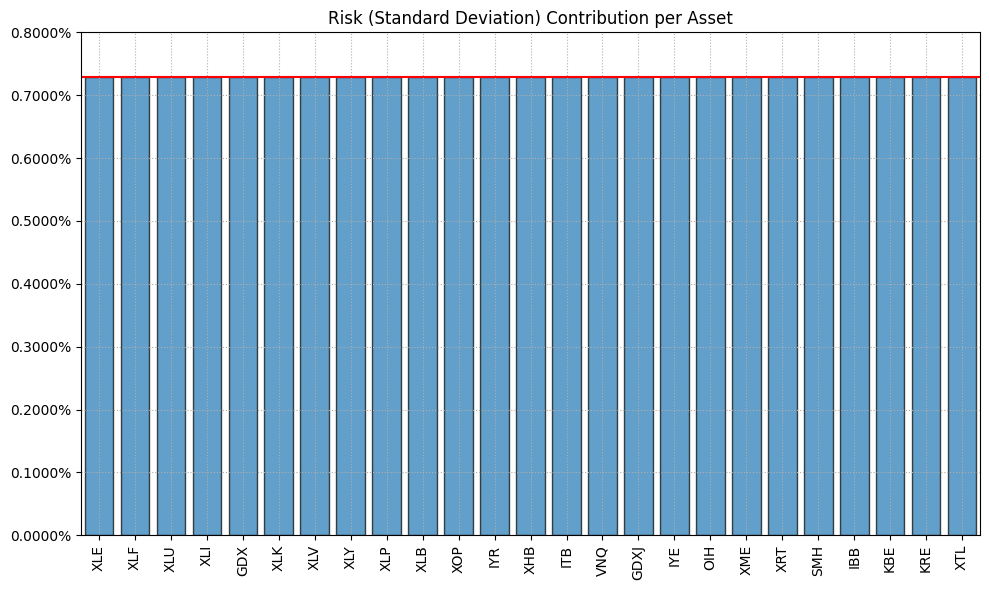

In [ ]:
# Plot the risk contributions of each ETF which as we can see is
# equal.
ax = rp.plot_risk_con(
    w,
    cov=port.cov,
    returns=port.returns,
    rm="MV",
    rf=0.05
)

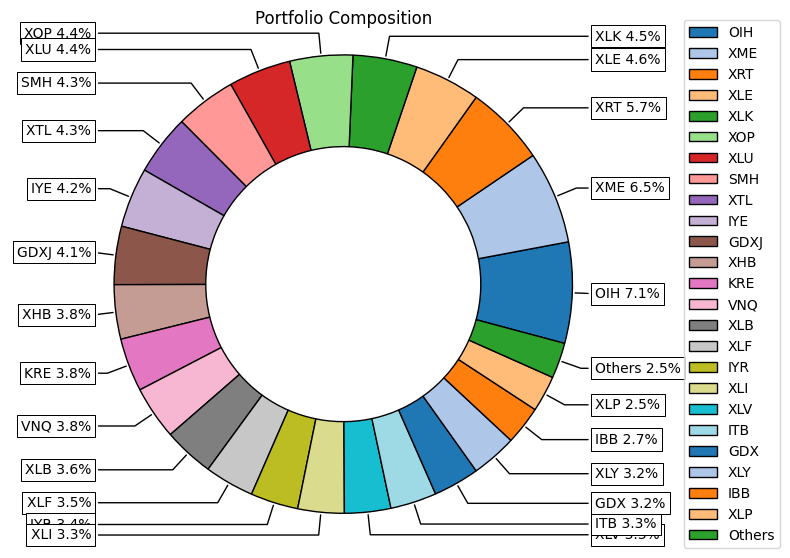

In [ ]:
# Plot the portfolio weights determined by equal risk contribution
ax = rp.plot_pie(w=w)

# Compute the number of shares to purchase
Compute the number of shares to purchase based on the optimized weights. Compute the investment amount based on the portfolio value. Note the Omega Algorithmic Trading app does all this for you...

In [ ]:
# Set the current portfolio value
port_val = 10_000

In [ ]:
# Figure out the dollar value of each asset to buy
w["invest_amt"] = w * port_val

In [ ]:
# Get the last traded price of each ETF
w["last_price"] = data.iloc[-1]

In [ ]:
# Compute the number of shares to buy based on the last
# price and confirm the total is about our portfolio value
w["shares"] = (w.invest_amt / w.last_price).astype(int)
(w["shares"] * w["last_price"]).sum()

8662.020004272461

# Execute the orders on IB
Now that we have the correct number of shares to buy, we can execute the trades algorithmically in our trading account! The Omega Algorithmic Trading app completely automates the execution of trades.

In [ ]:
w

,weights,invest_amt,last_price,shares
XLE,0.046400,463.999967,26.860001,17
XLF,0.034851,348.506992,32.430000,10
XLU,0.043990,439.903525,135.729996,3
XLI,0.032685,326.851837,102.430000,3
GDX,0.032490,324.896884,44.830002,7
XLK,0.045247,452.466804,87.099998,5
XLV,0.032609,326.094554,44.439999,7
XLY,0.032160,321.600500,48.709999,6
XLP,0.025484,254.838435,297.260010,0
XLB,0.035646,356.459765,201.750000,1
